## Go, Johann and Uy, Beatrice 

##### This program uses the independent variables CO(GT), PT08.S1(CO), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3) to predict the absolute humidity AH of each trial. 

### 1. Import libraries and dataset

In [2]:
import numpy as np #  used for working with arrays. 
import pandas as pd # a fast, powerful, flexible and easy to use open source data analysis and manipulation tool
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations in Python
%matplotlib inline
import seaborn as sns

In [3]:
# to import dataset from the same directory
df = pd.read_csv("AirQualityUCI.csv")

### 2. Preliminary dataset analysis

In [4]:
# to show the first five rows of the dataset
df.tail()

Date Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
9466  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9467  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9468  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9469  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9470  NaN  NaN     NaN          NaN       NaN       NaN            NaN   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)   T  RH  AH  \
9466      NaN           NaN      NaN           NaN          NaN NaN NaN NaN   
9467      NaN           NaN      NaN           NaN          NaN NaN NaN NaN   
9468      NaN           NaN      NaN           NaN          NaN NaN NaN NaN   
9469      NaN           NaN      NaN           NaN          NaN NaN NaN NaN   
9470      NaN           NaN      NaN           NaN          NaN NaN NaN NaN   

      Unnamed: 15  Unnamed: 16  
9466          NaN          NaN  
9467          NaN          NaN  
9468          NaN          NaN  
9469          NaN          NaN  
9470          NaN          NaN

In [5]:
# to show the number of rows and columns of the dataset
df.shape

(9471, 17)

In [6]:
# to check column names and total records
df.count

<bound method DataFrame.count of             Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     10/03/2004  18:00:00     2.6       1360.0     150.0      11.9   
1     10/03/2004  19:00:00     2.0       1292.0     112.0       9.4   
2     10/03/2004  20:00:00     2.2       1402.0      88.0       9.0   
3     10/03/2004  21:00:00     2.2       1376.0      80.0       9.2   
4     10/03/2004  22:00:00     1.6       1272.0      51.0       6.5   
...          ...       ...     ...          ...       ...       ...   
9466         NaN       NaN     NaN          NaN       NaN       NaN   
9467         NaN       NaN     NaN          NaN       NaN       NaN   
9468         NaN       NaN     NaN          NaN       NaN       NaN   
9469         NaN       NaN     NaN          NaN       NaN       NaN   
9470         NaN       NaN     NaN          NaN       NaN       NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0   

In [7]:
# to determine the variables' data types
df.dtypes


Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

In [8]:
# to view more information about the dataset 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB
None

### 3. Handling missing, duplicates, outliers of the dataset

In [9]:
df_imputed = df.copy()

#To drop inessential columns
df_imputed.drop(columns = ["Date", "Time", "Unnamed: 15", "Unnamed: 16"], inplace = True)
df_imputed.dtypes

CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [10]:
#To replace -200 values with NaN 
df_imputed = df_imputed[df_imputed.iloc[0:9357] != -200]

In [11]:
# to know if there is missing data
df_imputed.isnull().sum().sort_values(ascending=False)

NMHC(GT)         8557
CO(GT)           1797
NO2(GT)          1756
NOx(GT)          1753
AH                480
RH                480
T                 480
PT08.S5(O3)       480
PT08.S4(NO2)      480
PT08.S3(NOx)      480
PT08.S2(NMHC)     480
C6H6(GT)          480
PT08.S1(CO)       480
dtype: int64

In [12]:
df_imputed.drop_duplicates(inplace=True)
df_imputed

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0        2.6       1360.0     150.0      11.9         1046.0    166.0   
1        2.0       1292.0     112.0       9.4          955.0    103.0   
2        2.2       1402.0      88.0       9.0          939.0    131.0   
3        2.2       1376.0      80.0       9.2          948.0    172.0   
4        1.6       1272.0      51.0       6.5          836.0    131.0   
...      ...          ...       ...       ...            ...      ...   
9352     3.1       1314.0       NaN      13.5         1101.0    472.0   
9353     2.4       1163.0       NaN      11.4         1027.0    353.0   
9354     2.4       1142.0       NaN      12.4         1063.0    293.0   
9355     2.1       1003.0       NaN       9.5          961.0    235.0   
9356     2.2       1071.0       NaN      11.9         1047.0    265.0   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0           1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578  
1           1174.0     92.0        1559.0        972.0  13.3  47.7  0.7255  
2           1140.0    114.0        1555.0       1074.0  11.9  54.0  0.7502  
3           1092.0    122.0        1584.0       1203.0  11.0  60.0  0.7867  
4           1205.0    116.0        1490.0       1110.0  11.2  59.6  0.7888  
...            ...      ...           ...          ...   ...   ...     ...  
9352         539.0    190.0        1374.0       1729.0  21.9  29.3  0.7568  
9353         604.0    179.0        1264.0       1269.0  24.3  23.7  0.7119  
9354         603.0    175.0        1241.0       1092.0  26.9  18.3  0.6406  
9355         702.0    156.0        1041.0        770.0  28.3  13.5  0.5139  
9356         654.0    168.0        1129.0        816.0  28.5  13.1  0.5028  

[9326 rows x 13 columns]

In [13]:
x_columns = df_imputed.columns
x_columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [14]:
df_imputed.dropna(subset = x_columns, inplace=True)
df_imputed

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0        2.6       1360.0     150.0      11.9         1046.0    166.0   
1        2.0       1292.0     112.0       9.4          955.0    103.0   
2        2.2       1402.0      88.0       9.0          939.0    131.0   
3        2.2       1376.0      80.0       9.2          948.0    172.0   
4        1.6       1272.0      51.0       6.5          836.0    131.0   
...      ...          ...       ...       ...            ...      ...   
1226     4.4       1449.0     501.0      19.5         1282.0    254.0   
1227     3.1       1363.0     234.0      15.1         1152.0    189.0   
1228     3.0       1371.0     212.0      14.6         1136.0    174.0   
1229     3.1       1406.0     275.0      13.7         1107.0    167.0   
1230     3.5       1425.0     275.0      15.2         1155.0    185.0   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0           1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578  
1           1174.0     92.0        1559.0        972.0  13.3  47.7  0.7255  
2           1140.0    114.0        1555.0       1074.0  11.9  54.0  0.7502  
3           1092.0    122.0        1584.0       1203.0  11.0  60.0  0.7867  
4           1205.0    116.0        1490.0       1110.0  11.2  59.6  0.7888  
...            ...      ...           ...          ...   ...   ...     ...  
1226         625.0    133.0        2100.0       1569.0  19.1  61.1  1.3345  
1227         684.0    110.0        1951.0       1495.0  18.2  65.4  1.3529  
1228         689.0    102.0        1927.0       1471.0  18.1  66.1  1.3579  
1229         718.0    108.0        1872.0       1384.0  17.7  66.9  1.3422  
1230         709.0    110.0        1936.0       1789.0  17.8  66.8  1.3460  

[827 rows x 13 columns]

In [15]:
# to know if there is missing data
df_imputed.isnull().sum().sort_values(ascending=False)

AH               0
RH               0
T                0
PT08.S5(O3)      0
PT08.S4(NO2)     0
NO2(GT)          0
PT08.S3(NOx)     0
NOx(GT)          0
PT08.S2(NMHC)    0
C6H6(GT)         0
NMHC(GT)         0
PT08.S1(CO)      0
CO(GT)           0
dtype: int64

In [16]:
df_noduplicates= df_imputed.copy()

In [17]:
# to determine if there are any duplicates
df_noduplicates.duplicated().sum()

0

In [18]:
# to view the duplicate records
duplicates = df_noduplicates.duplicated()

df_noduplicates[duplicates]

Empty DataFrame
Columns: [CO(GT), PT08.S1(CO), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T, RH, AH]
Index: []

In [19]:
# to get the column names of the datset
columns = df_noduplicates.columns
columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [20]:
# to convert arrays to list
columns = columns.tolist()

In [21]:
# to retein the column names of the independent variable
x_columns = df_noduplicates.columns
x_columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [22]:
# to convert arrays to list
x_columns = x_columns.tolist()

<AxesSubplot:>

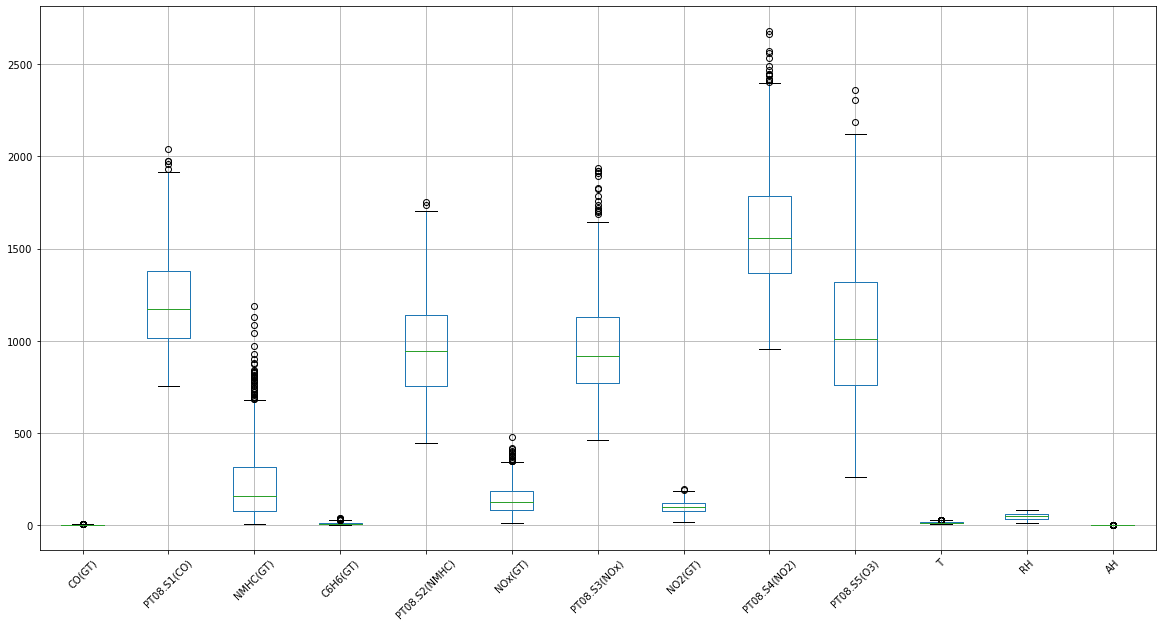

In [23]:
# to show the boxplot
df_noduplicates.boxplot(column = columns, rot=45, figsize = (20,10))

In [24]:
# to determine the outliers
df_outliers = pd.DataFrame(df_noduplicates.loc[:,])

# Calculate IQR
Q1 = df_outliers.quantile(0.25)
Q3 = df_outliers.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

CO(GT)             1.80000
PT08.S1(CO)      363.00000
NMHC(GT)         241.50000
C6H6(GT)          10.00000
PT08.S2(NMHC)    388.50000
NOx(GT)          106.00000
PT08.S3(NOx)     362.00000
NO2(GT)           43.50000
PT08.S4(NO2)     414.00000
PT08.S5(O3)      560.00000
T                  6.40000
RH                23.85000
AH                 0.20855
dtype: float64


In [25]:
df_outliers.head()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     2.6       1360.0     150.0      11.9         1046.0    166.0   
1     2.0       1292.0     112.0       9.4          955.0    103.0   
2     2.2       1402.0      88.0       9.0          939.0    131.0   
3     2.2       1376.0      80.0       9.2          948.0    172.0   
4     1.6       1272.0      51.0       6.5          836.0    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0        1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578  
1        1174.0     92.0        1559.0        972.0  13.3  47.7  0.7255  
2        1140.0    114.0        1555.0       1074.0  11.9  54.0  0.7502  
3        1092.0    122.0        1584.0       1203.0  11.0  60.0  0.7867  
4        1205.0    116.0        1490.0       1110.0  11.2  59.6  0.7888

In [26]:
# to use IQR score to filter out the outliers by keeping only valid values

# to replace every outlier on the upper side by the upper whisker 
for i, j in zip(np.where(df_outliers > Q3 + 1.5 * IQR)[0], np.where(df_outliers > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    df_outliers.iloc[i,j] = whisker[j]
    
# to replace every outlier on the lower side by the lower whisker 
for i, j in zip(np.where(df_outliers < Q1 - 1.5 * IQR)[0], np.where(df_outliers < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    df_outliers.iloc[i,j] = whisker[j]

In [27]:
# to remove all columns
df_noduplicates.drop(columns =  df_noduplicates.loc[:,], inplace = True)

In [28]:
# to concatenate the new columns in the dataset where outliers were replaced with whisker values
df_noduplicates = pd.concat([df_noduplicates , df_outliers], axis = 1)


<AxesSubplot:>

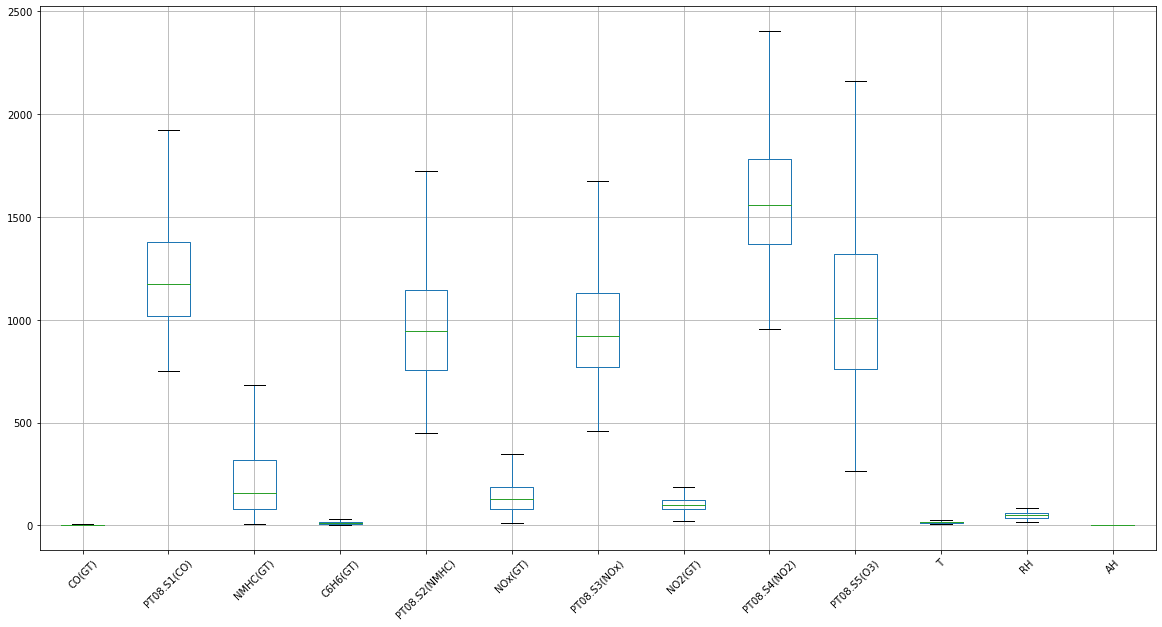

In [29]:
# to show the boxplot of the dataset where outliers were replaced with whisker values
df_noduplicates.boxplot(column = columns, rot=45, figsize = (20,10))

### Data cleaning summary

1. There were missing values in the dataset represented as -200, and they were handled by removing the row that consisted of at least one missing value
2. From the initial 9356 rows, 827 remained after the removal process.
3. There were outliers in all the independent variable columns. Handled the said outliers by replacing every outlier with upper side of the whisker.
4. There were outliers in T and AH columns also, handled these outliers by replacing every outlier with lower side of the whisker.

### 4. Exploratory data analysis

In [30]:
df_clean = df_noduplicates.copy()


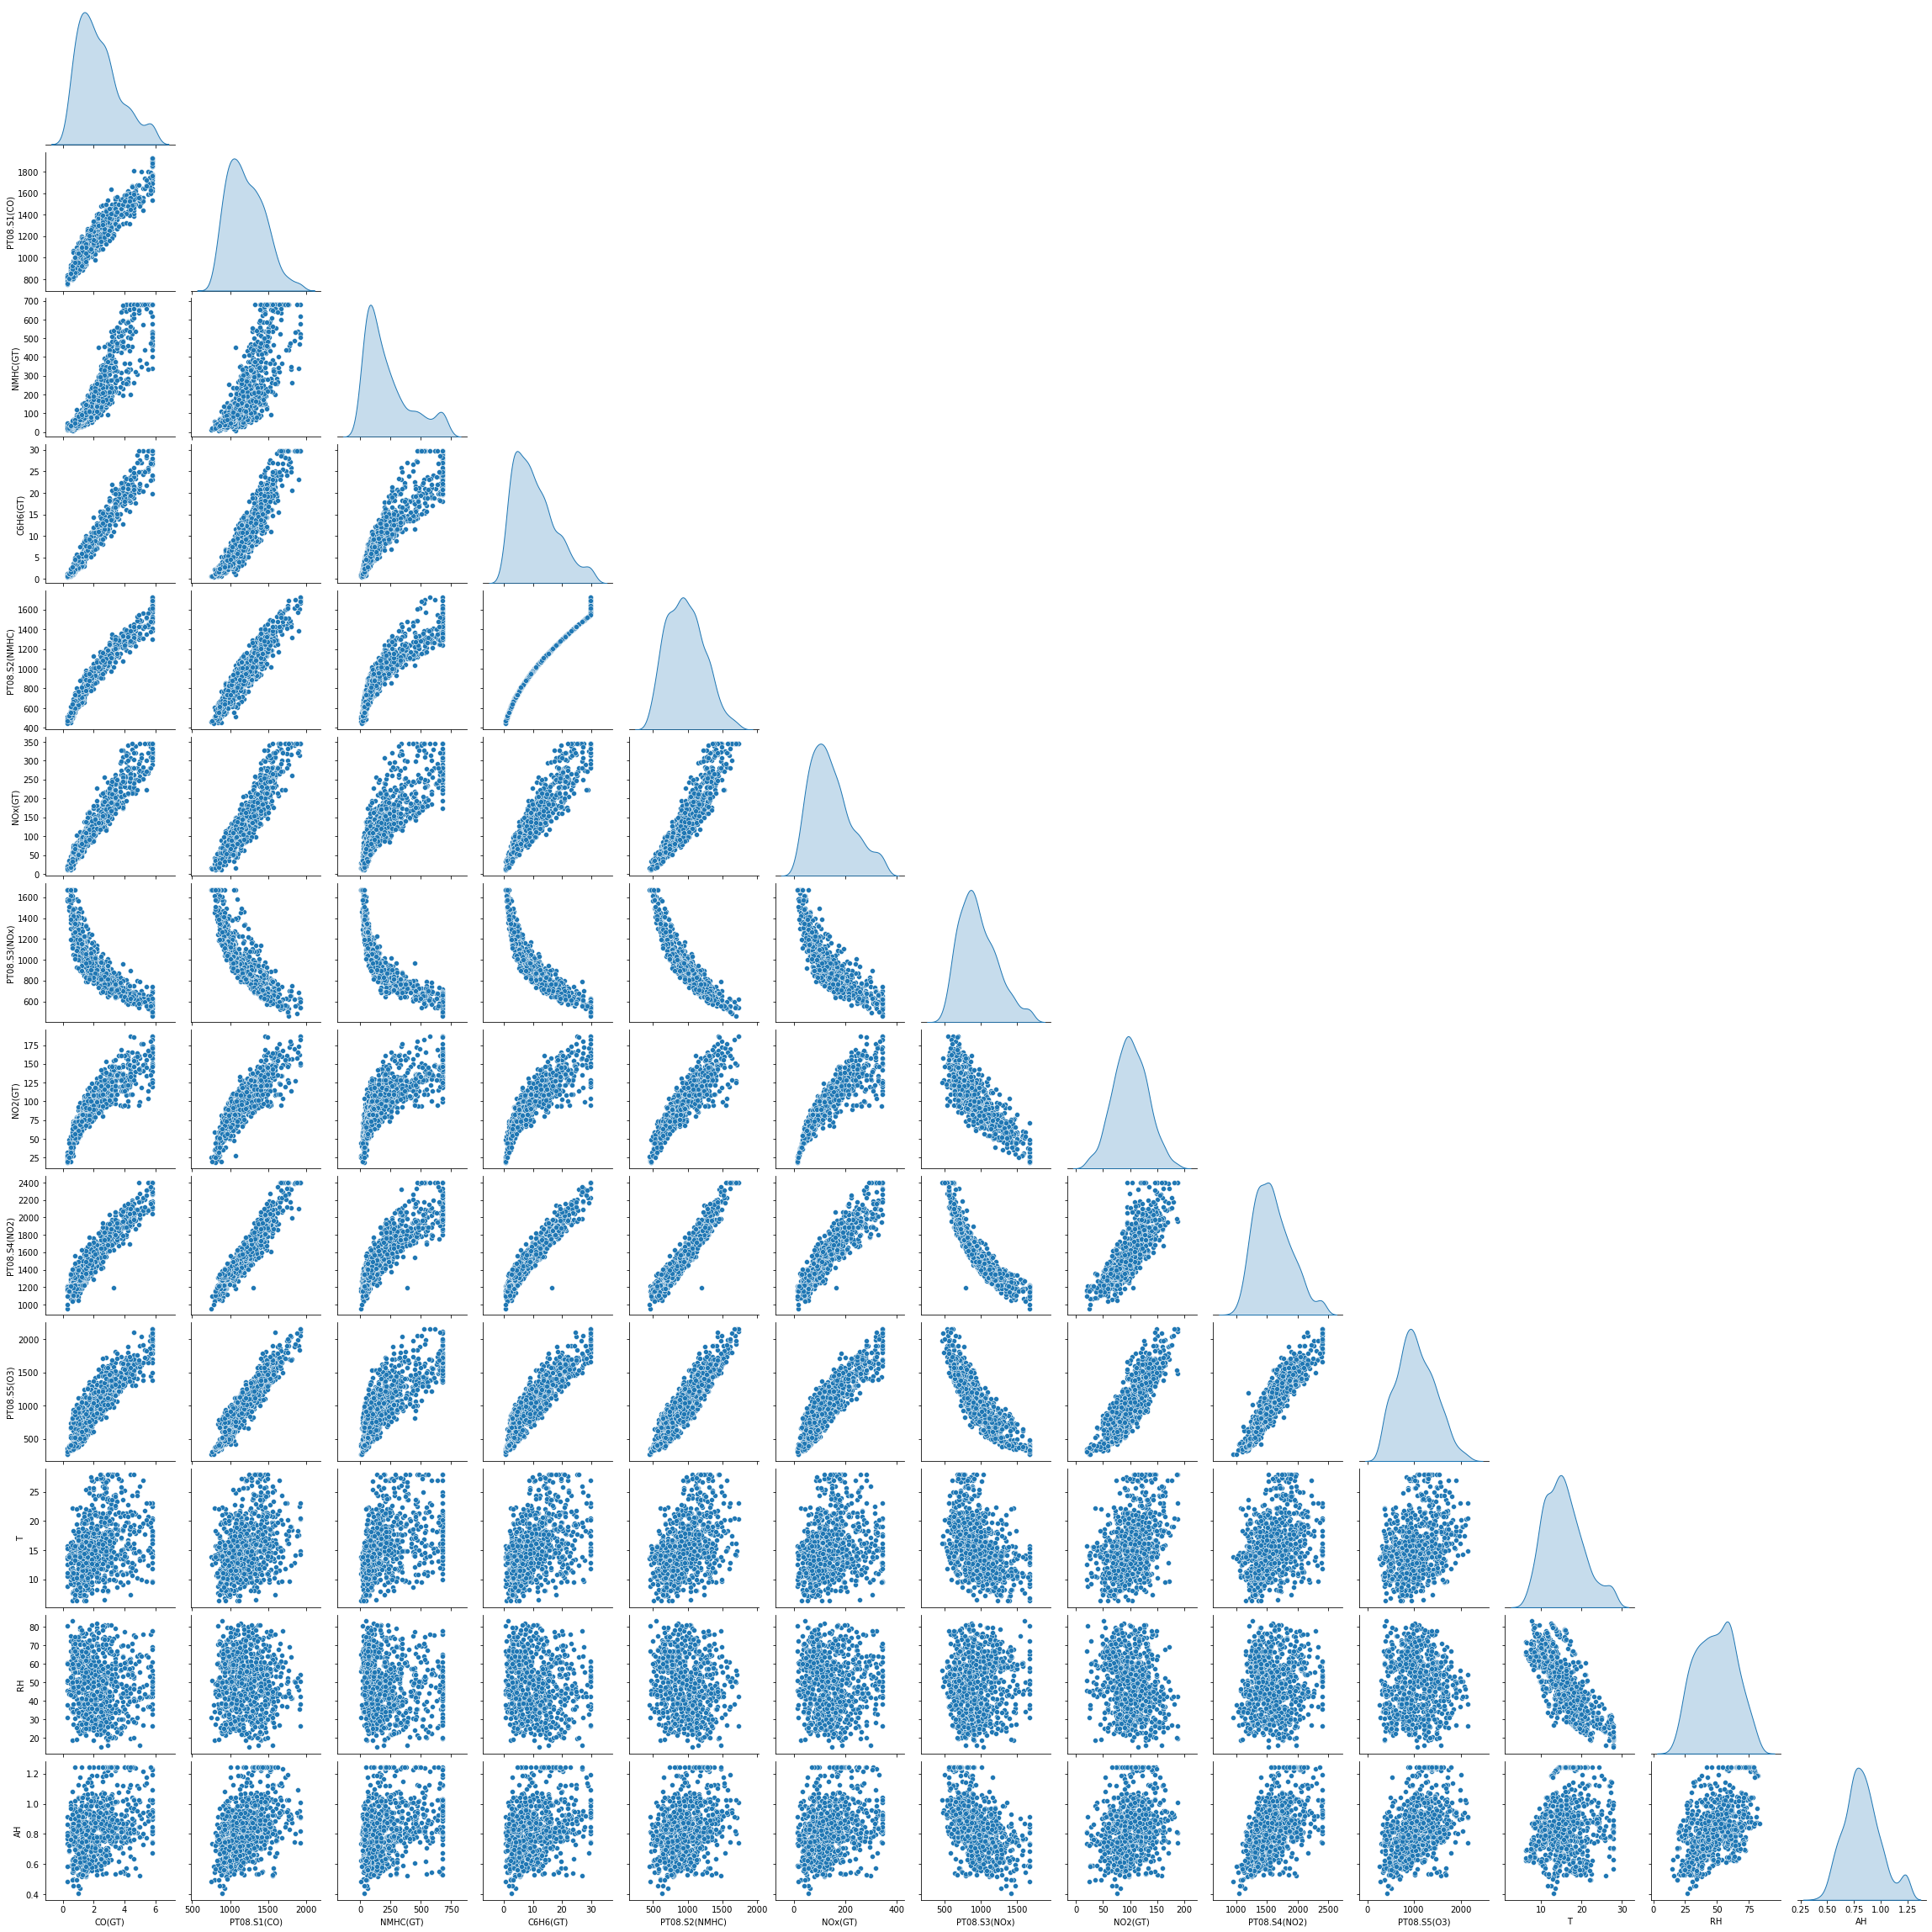

In [31]:
sns.pairplot(df_clean, diag_kind = 'kde', corner = True);

Diagonals Analysis If we look at KDE diagonal plots, there are at least 2 Gaussians (2 peaks) in Slag, Ash, Superplastic and Age, even though it's not unsupervised learning but in this dataset there are at least 2 clusters and there may be more.

Range of clusters in this dataset is 2 to 4.

The diagonal analysis give same insights as we got from univariate analysis.

Off Diagonal Analysis: Relationship between indpendent attributes Scatter plots Cement vs other independent attributes: This attribute does not have any significant relation with other independent features. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

Slag vs other independent attributes: This attribute does not have any significant relation with other independent features. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

Ash vs other independent attributes: This attribute does not have any significant relation with other independent features. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

Water vs other independent attributes: This attribute have negative curvy-linear relationship with Fineagg, Coarseagg and Superplastic, as Water content increases means Fineagg, Coarseagg and Superplastic are reducing. It does not have any significant relationship with other independent atributes.

Superplastic vs other independent attributes:This attribute have negative linear relationship with water only. It does not have any significant relationship with other independent attributes.

Coarseagg vs other independent attributes: This attribute does not have any significant relation with other independent features. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

Fineagg vs other independent attributes: It has negative linear relationship with water. It does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

The reason why we are doing all this analysis is if we find any kind of dimensions which are very strongly correlated i.e. r value close to 1 or -1 such dimensions are giving same information to your algorithms, its a redundant dimension. So in such cases we may want to keep one and drop the other which we should keep and which we should drop depends on again your domain expertise, which one of the dimension is more prone to errors.I would like to drop that dimension. Or we have a choice to combine these dimensions and create a composite dimension out of it.

In [32]:
df_clean.corr()
df_clean

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0        2.6       1360.0     150.0      11.9         1046.0    166.0   
1        2.0       1292.0     112.0       9.4          955.0    103.0   
2        2.2       1402.0      88.0       9.0          939.0    131.0   
3        2.2       1376.0      80.0       9.2          948.0    172.0   
4        1.6       1272.0      51.0       6.5          836.0    131.0   
...      ...          ...       ...       ...            ...      ...   
1226     4.4       1449.0     501.0      19.5         1282.0    254.0   
1227     3.1       1363.0     234.0      15.1         1152.0    189.0   
1228     3.0       1371.0     212.0      14.6         1136.0    174.0   
1229     3.1       1406.0     275.0      13.7         1107.0    167.0   
1230     3.5       1425.0     275.0      15.2         1155.0    185.0   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH        AH  
0           1056.0    113.0        1692.0       1268.0  13.6  48.9  0.757800  
1           1174.0     92.0        1559.0        972.0  13.3  47.7  0.725500  
2           1140.0    114.0        1555.0       1074.0  11.9  54.0  0.750200  
3           1092.0    122.0        1584.0       1203.0  11.0  60.0  0.786700  
4           1205.0    116.0        1490.0       1110.0  11.2  59.6  0.788800  
...            ...      ...           ...          ...   ...   ...       ...  
1226         625.0    133.0        2100.0       1569.0  19.1  61.1  1.240325  
1227         684.0    110.0        1951.0       1495.0  18.2  65.4  1.240325  
1228         689.0    102.0        1927.0       1471.0  18.1  66.1  1.240325  
1229         718.0    108.0        1872.0       1384.0  17.7  66.9  1.240325  
1230         709.0    110.0        1936.0       1789.0  17.8  66.8  1.240325  

[827 rows x 13 columns]

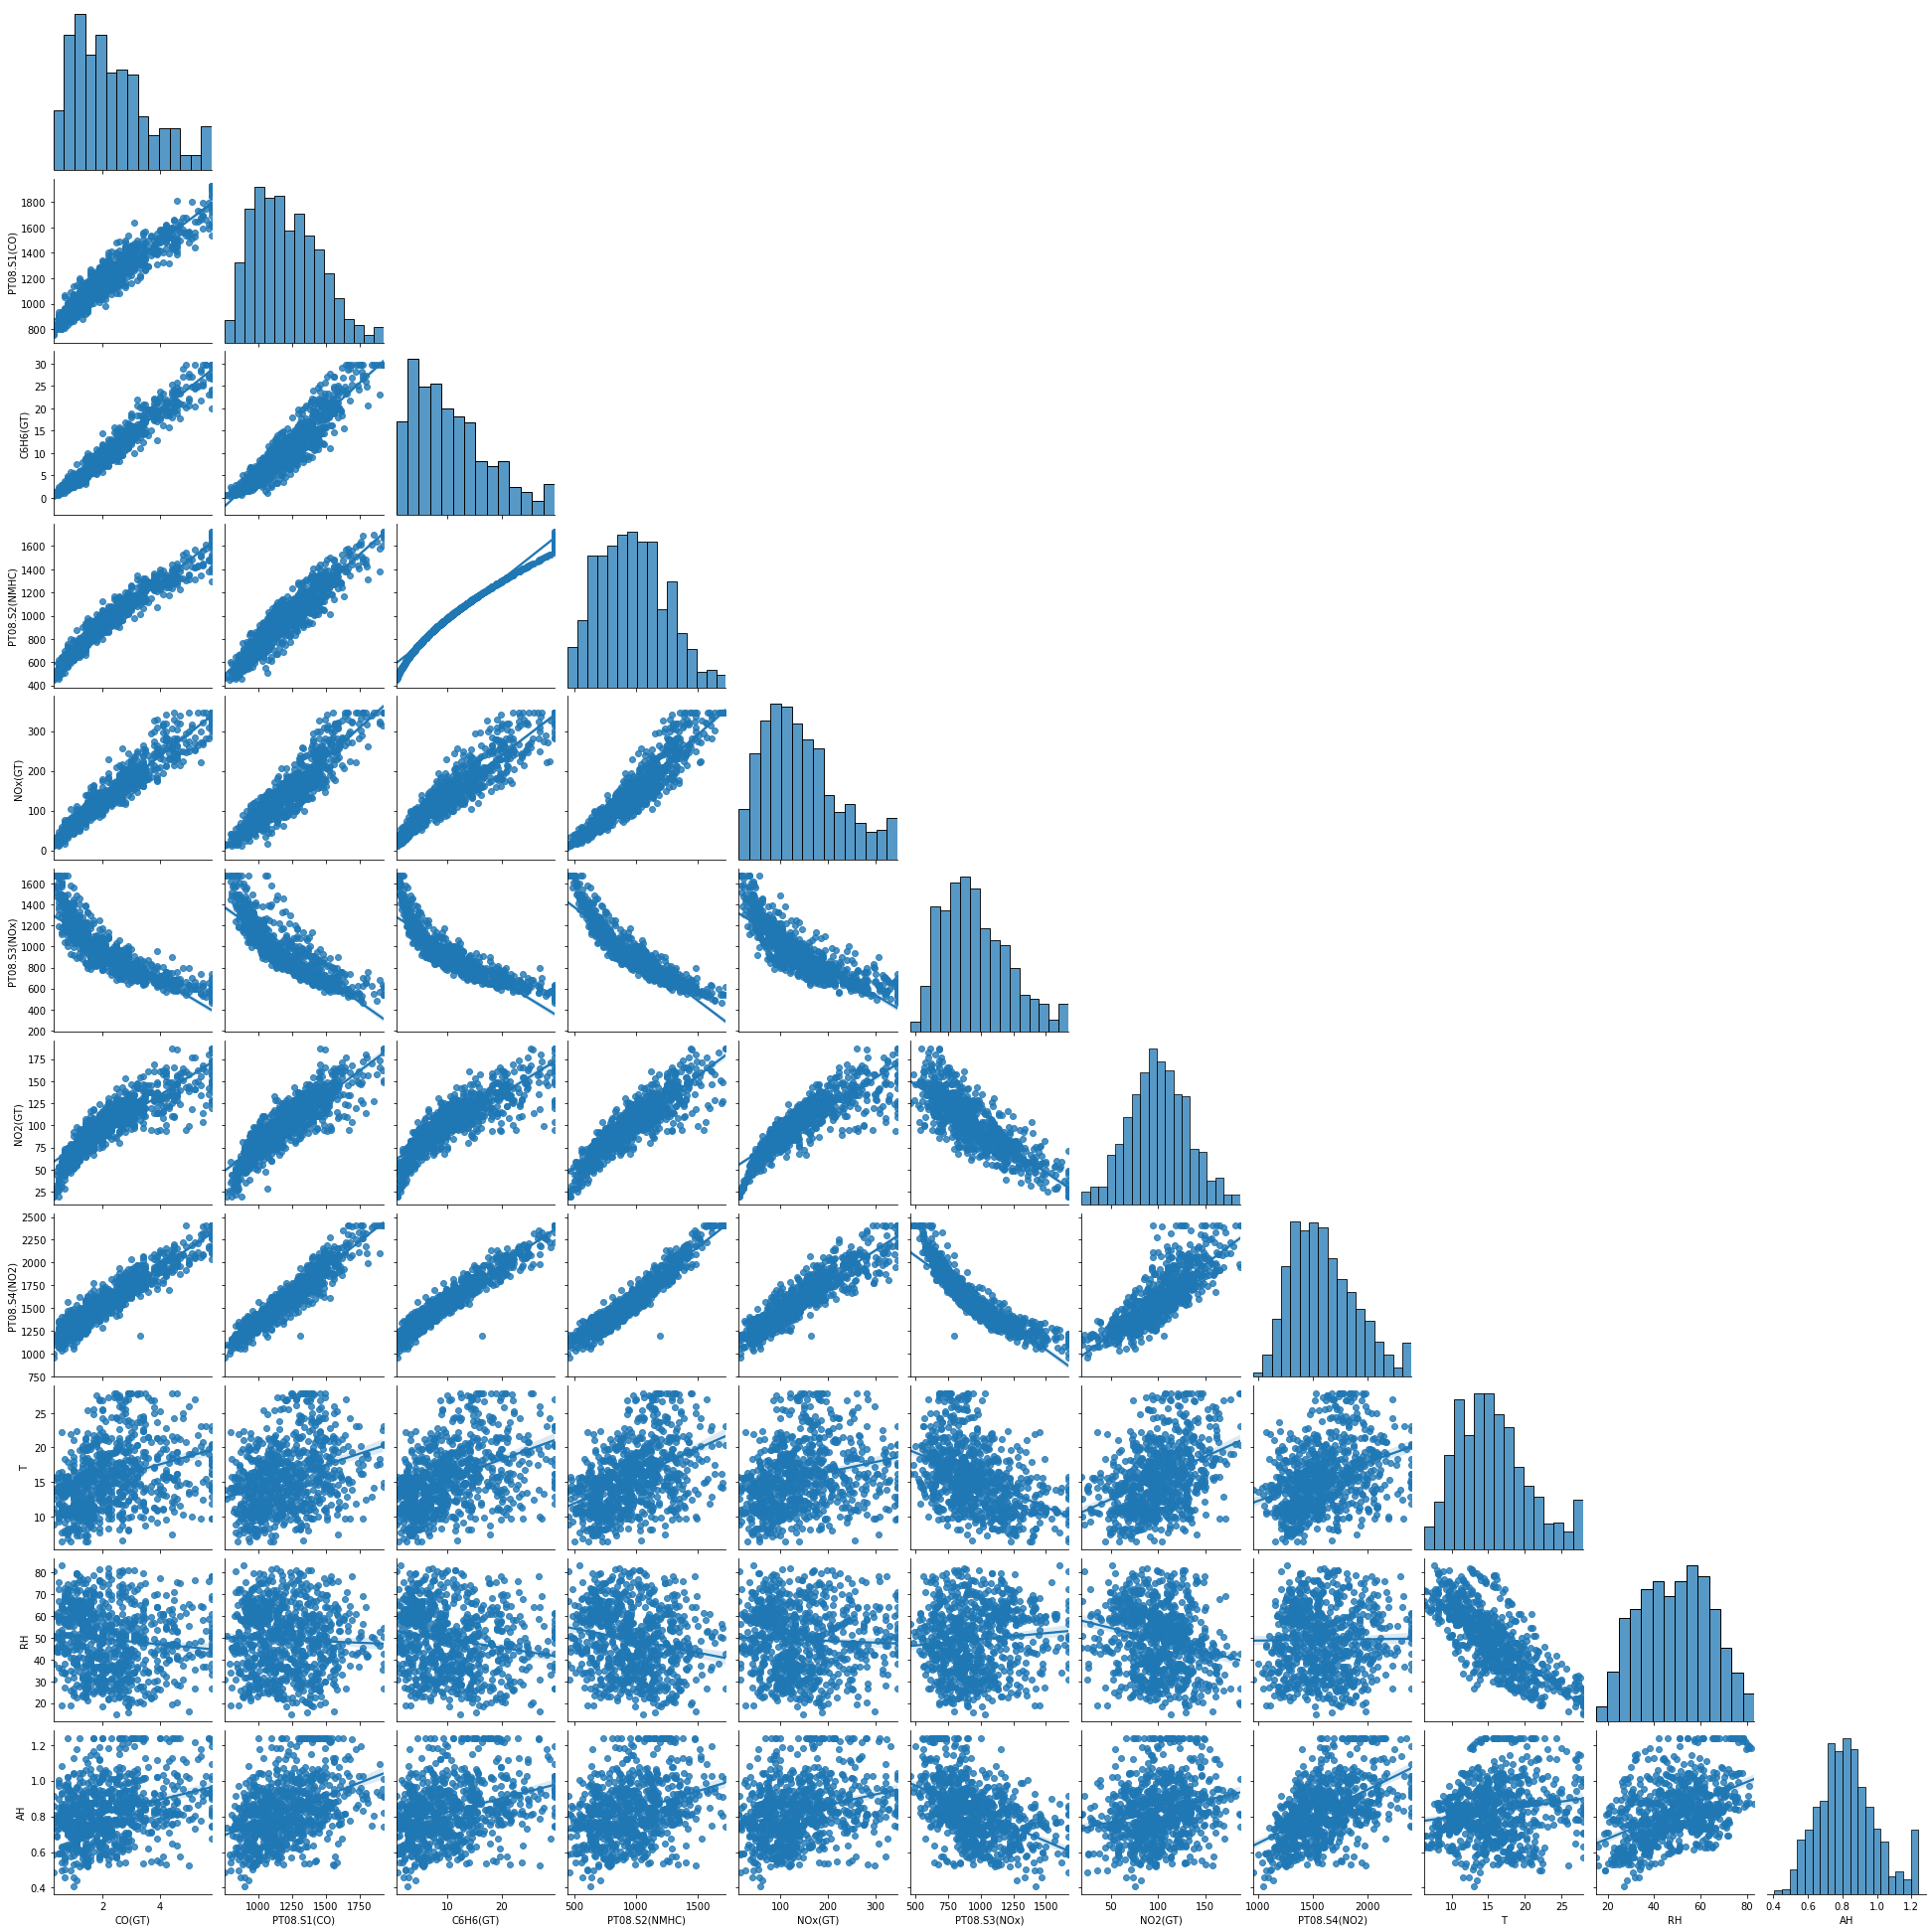

In [46]:
sns.pairplot(df_clean[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
       'NO2(GT)', 'PT08.S4(NO2)', 'T', 'RH', 'AH']], kind = 'reg', corner = True);

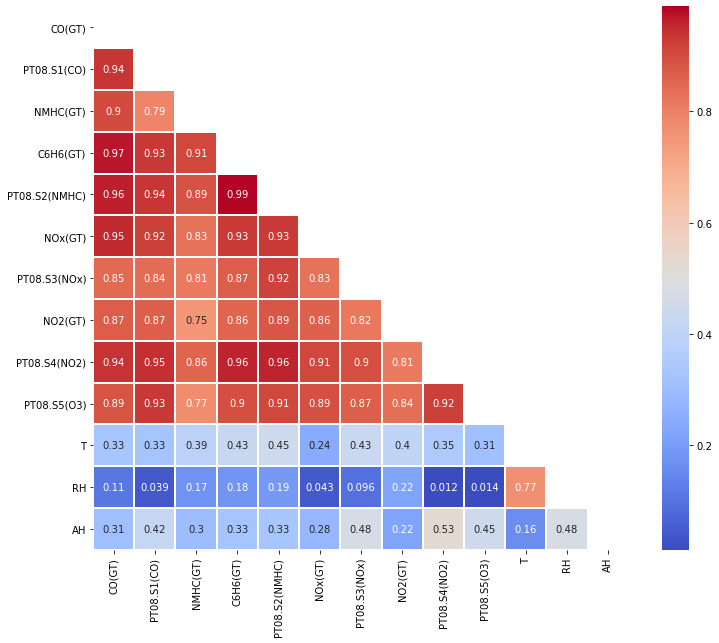

In [47]:
corr = abs(df_clean.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (12,10))
sns.heatmap(lower_triangle, center = 0.5, cmap = 'coolwarm', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= True, linewidths= 1, mask = mask)   # Da Heatmap
plt.show()

Observations:

Looking at the Correlation table, temperature T, Relative Humidty RH, and Absolute Humidity AH, all have low positive correlation to each of the 10 independent variables: CO(GT), PT08.S1(CO), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4 (NO2), PT08.S5(O3). Observing the dependent variable RH, it can be assumed that it has the least amount of correlation to the independent variables, as compared to T and AH where their lowest correlations are, respectively 0.31 and 0.22.

Moreover, for T, it can be observed that PT08.S2(NMHC) has the highest positive correlation with temperature 0.45, while NOx(GT) has the lowest yet still a relatively positive correlation with temperature 0.24.


For RH, NO2(GT) has the highest yet a low positive correlation with the variable 0.22, while PTO8.S4(NO2) has the lowest positive correlation to RH 0.012 and can be close to having little to no correlation at all.

For AH, PT08.S4(NO2) has the highest moederately positive correlation with absolute humidity 0.53, while NO2(GT) has the lowest positive correlation with the variable 0.22.


### 5. Creating training and testing dataset

In [68]:

X = df_clean.iloc[:,[1,2,3,4,5,6,7,8,9]].values
Y = df_clean.iloc[:,[12]].values

In [69]:
# to split the whole dataset into training dataset and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0) #train_size=0.8, you can either still put this or not since test_size is already defined. By default, remaining is for training

In [70]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('Y_train shape : ({0},)'.format(Y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('Y_test shape : ({0},)'.format(Y_test.shape[0]))

X_train shape : (661,9)
Y_train shape : (661,)
X_test shape : (166,9)
Y_test shape : (166,)


### 6. Machine Learning Modeling

In [71]:
# To fit the training dataset into a multiple linear regression model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train,Y_train)

LinearRegression()

In [72]:
# To predict the output of the testing dataset
Y_predict = mlr.predict(X_test)

### 7. Measuring Model Performance

In [73]:
# To apply K-fold cross-validation for the multilinear regression model
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [74]:
# For the Mean Squared Error as scoring for for cross-validation 
MAE = (cross_val_score(estimator=mlr, X=X_train, y=Y_train, cv=k_fold, scoring='neg_mean_absolute_error'))*-1

MAE_average = MAE.mean()
MAE_variance = MAE.std()

print('Mean Absolute Error of K-FOLDS:')
print (MAE)
print(' ')
print('Average Mean Absolute Error of K-FOLDS:')
print(MAE_average)
print(' ')
print('Mean Absolute Error Variance of K-FOLDS:')
print(MAE_variance)
print(' ')

Mean Absolute Error of K-FOLDS:
[0.0566238  0.05656399 0.05446912 0.06059026 0.05783203 0.04621807
 0.05125847 0.05355847 0.0516585  0.04447764]
 
Average Mean Absolute Error of K-FOLDS:
0.05332503640455828
 
Mean Absolute Error Variance of K-FOLDS:
0.004813170239432588
 


In [75]:
# For the Mean Squared Error as scoring for for cross-validation 
MSE = (cross_val_score(estimator=mlr, X=X_train, y=Y_train, cv=k_fold, scoring='neg_mean_squared_error'))*-1

MSE_average = MSE.mean()
MSE_variance = MSE.std()

print('Mean Squared Error of K-FOLDS:')
print (MSE)
print(' ')
print('Average Mean Squared Error of K-FOLDS:')
print(MSE_average)
print(' ')
print('Mean Squared Error Variance of K-FOLDS:')
print(MSE_variance)
print(' ')

Mean Squared Error of K-FOLDS:
[0.00510357 0.00489719 0.00464643 0.00592016 0.00598407 0.00335876
 0.0040989  0.00434922 0.00531253 0.00297483]
 
Average Mean Squared Error of K-FOLDS:
0.004664566622241314
 
Mean Squared Error Variance of K-FOLDS:
0.0009468049949798623
 


In [78]:
# For the R Squared Error as scoring for for cross-validation 
R2 = (cross_val_score(estimator=mlr, X=X_train, y=Y_train, cv=k_fold, scoring='r2'))

R2_average = R2.mean()
R2_variance = R2.std()

print('R Squared Error of K-FOLDS:')
print (R2)
print(' ')
print('Average R Squared Error of K-FOLDS:')
print(R2_average)
print(' ')
print('R Squared Error Variance of K-FOLDS:')
print(R2_variance)
print(' ')

R Squared Error of K-FOLDS:
[0.7745118  0.83156771 0.86309045 0.774582   0.82627666 0.89373565
 0.77941715 0.80491986 0.81917964 0.89589629]
 
Average R Squared Error of K-FOLDS:
0.826317720786965
 
R Squared Error Variance of K-FOLDS:
0.04339939459301131
 


In [77]:
# To evaluate the performance of the multiple linear regression model using holdout
# A. For the Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
MAE_hold = mean_absolute_error(Y_test, Y_predict)
print('Mean Absolute Error: %.4f'
      % MAE_hold)
print(' ')

# B. For the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
MSE_hold = mean_squared_error(Y_test, Y_predict)
print('Mean Squared Error: %.4f'
      % MSE_hold)
print(' ')  

# C. For the Root Mean Squared Error (RMSE)/Deviation
from math import sqrt
RMSE_hold = sqrt(MSE_hold)
print('Root Mean Squared Error: %.4f'
      % RMSE_hold)
print(' ') 

# D. For the Explained Variance Score (EVS) -> ideal is 1
from sklearn.metrics import explained_variance_score
EVS_hold = explained_variance_score(Y_test, Y_predict)
print('Explained Variance Score: %.4f'
      % EVS_hold)
print(' ') 

# E. For the Coefficient of Determination Regression Score Function, R Squared Error (R2) -> ideal is 1
from sklearn.metrics import r2_score
R2_hold = r2_score(Y_test, Y_predict)
print('R2 Error: %.4f'
      % R2_hold)
print(' ')  

Mean Absolute Error: 0.0620
 
Mean Squared Error: 0.0104
 
Root Mean Squared Error: 0.1021
 
Explained Variance Score: 0.6799
 
R2 Error: 0.6780
 
